In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load user, ratings, and movie data
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

In [3]:
ratings.head

<bound method NDFrame.head of        user_id  movie_id  rating  unix_timestamp
0          196       242       3       881250949
1          186       302       3       891717742
2           22       377       1       878887116
3          244        51       2       880606923
4          166       346       1       886397596
...        ...       ...     ...             ...
99995      880       476       3       880175444
99996      716       204       5       879795543
99997      276      1090       1       874795795
99998       13       225       2       882399156
99999       12       203       3       879959583

[100000 rows x 4 columns]>

In [4]:
ratings.dtypes

user_id           int64
movie_id          int64
rating            int64
unix_timestamp    int64
dtype: object

# Get user input query

In [5]:
input_query_df = pd.read_csv("Movielens (Responses) - Form Responses 1.csv")
query_len = len(input_query_df)

# Only get the latest response
input_query_df = input_query_df[-1:]

In [6]:
# Only keep movies and ratings in dataframe
input_genres_df = input_query_df['Out of all of the genres below, what are your top 3 favorites?']
input_query_df = input_query_df.drop(['Out of all of the genres below, what are your top 3 favorites?', 'Timestamp'], axis = 1)
input_query = input_query_df.to_dict()
print(input_query)

{'Toy Story (1995)': {1: '1 - Hated it'}, 'Twelve Monkeys (1995)': {1: '5 - Loved it'}, 'Star Wars (1977)': {1: '5 - Loved it'}, 'Pulp Fiction (1994)': {1: '3 - Neutral'}, 'Silence of the Lambs, The (1991)': {1: '5 - Loved it'}, 'Fargo (1996)': {1: '5 - Loved it'}, 'Independence Day (ID4) (1996)': {1: '5 - Loved it'}, 'Godfather, The (1972)': {1: '5 - Loved it'}, 'Raiders of the Lost Ark (1981)': {1: '5 - Loved it'}, 'Return of the Jedi (1983)': {1: "2 - Didn't like it"}, 'Contact (1997)': {1: '5 - Loved it'}, 'English Patient, The (1996)': {1: '3 - Neutral'}, 'Scream (1996)': {1: '5 - Loved it'}, 'Liar Liar (1997)': {1: '3 - Neutral'}, 'Air Force One (1997)': {1: '5 - Loved it'}}


In [7]:
# Turn into dict{movie_id: rating}
input_ratings = {}
possible_ratings = ['1', '2', '3', '4', '5']
for movie in input_query:
    rating = input_query[movie][query_len-1]
    title_row = movies.loc[movies['title'] == movie]
    title_row
    movie_id = title_row.iloc[0]['movie_id']
    if rating[0] in possible_ratings:
        input_ratings[movie_id] = int(rating[0])
    

print(input_ratings)

{1: 1, 7: 5, 50: 5, 56: 3, 98: 5, 100: 5, 121: 5, 127: 5, 174: 5, 181: 2, 258: 5, 286: 3, 288: 5, 294: 3, 300: 5}


In [8]:
# Get user input's top 3 favorite genres
input_genres = input_genres_df.values.tolist()[0].split(',')
print(input_genres)

['Adventure', ' Crime', ' Drama']


# Add new user to dataset

In [9]:
# Add to ratings

new_user = '944'

user = ['944'] * 10
input_movies = []
input_ratings = [5] * 10
input_time = [0] * 10

# Sample: all children's movies
input_movies.append("1")
input_movies.append("8")
input_movies.append("63")
input_movies.append("71")
input_movies.append("35")
input_movies.append("1531")
input_movies.append("1540")
input_movies.append("91")
input_movies.append("94")
input_movies.append("95")

# # Append to ratings
new_ratings = {'user_id':user, 'movie_id': input_movies, 'rating': input_ratings, 'unix_timestamp': input_time}
add_ratings = pd.DataFrame(data = new_ratings)
add_ratings['user_id'] = add_ratings['user_id'].astype(int)
add_ratings['movie_id'] = add_ratings['movie_id'].astype(int)
# ratings = ratings.append(add_ratings, ignore_index = True)
ratings = pd.concat([add_ratings, ratings]).reset_index(drop = True)
ratings.head(20)


,user_id,movie_id,rating,unix_timestamp
0,944,1,5,0
1,944,8,5,0
2,944,63,5,0
3,944,71,5,0
4,944,35,5,0
5,944,1531,5,0
6,944,1540,5,0
7,944,91,5,0
8,944,94,5,0
9,944,95,5,0


In [10]:
#ratings.drop(ratings.tail(10).index,inplace=True)
ratings.shape

(100010, 4)

In [11]:
# Look up title row for children's
for movie in input_movies:
    kids_row = movies.loc[movies['movie_id'] == int(movie)]
    print(kids_row)

   movie_id             title release_date  video_release_date  \
0         1  Toy Story (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...              0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  

[1 rows x 24 columns]
   movie_id        title release_date  video_release_date  \
7         8  Babe (1995)  01-Jan-1995                 NaN   

                                         imdb_url  genre_unknown  Action  \
7  http://us.imdb.com/M/title-exact?Babe%20(1995)              0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
7          0          0         1  ...        0          0     

In [12]:
# Look up kid's movies
kids_row = movies.loc[movies['Children'] == 1]
kids_row.head(20)

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34,35,Free Willy 2: The Adventure Home (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Free%20Willy%...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
62,63,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70,71,"Lion King, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?Lion%20King,%...",0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
77,78,Free Willy (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Free%20Willy%...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
90,91,"Nightmare Before Christmas, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Nightmare%20B...,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
93,94,Home Alone (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Home%20Alone%...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,95,Aladdin (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Aladdin%20(1992),0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
98,99,Snow White and the Seven Dwarfs (1937),01-Jan-1937,NaN,http://us.imdb.com/M/title-exact?Snow%20White%...,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [13]:
users.dtypes

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object

In [14]:
# Create new user

new_person = pd.DataFrame(data = {'user_id': 944, 'age': 21}, index = [0])
users = users.append(new_person, ignore_index = True)
users.tail

<bound method NDFrame.tail of      user_id  age  sex     occupation zip_code
0          1   24    M     technician    85711
1          2   53    F          other    94043
2          3   23    M         writer    32067
3          4   24    M     technician    43537
4          5   33    F          other    15213
..       ...  ...  ...            ...      ...
939      940   32    M  administrator    02215
940      941   20    M        student    97229
941      942   48    F      librarian    78209
942      943   22    M        student    77841
943      944   21  NaN            NaN      NaN

[944 rows x 5 columns]>

In [15]:
users.dtypes

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object

In [16]:
# 0-index data
users["user_id"] = users["user_id"].apply(lambda x: str(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

In [17]:
print(users)

    user_id  age  sex     occupation zip_code
0         0   24    M     technician    85711
1         1   53    F          other    94043
2         2   23    M         writer    32067
3         3   24    M     technician    43537
4         4   33    F          other    15213
..      ...  ...  ...            ...      ...
939     939   32    M  administrator    02215
940     940   20    M        student    97229
941     941   48    F      librarian    78209
942     942   22    M        student    77841
943     943   21  NaN            NaN      NaN

[944 rows x 5 columns]


In [18]:
print(ratings)

       user_id movie_id  rating  unix_timestamp
0          943        0     5.0               0
1          943        7     5.0               0
2          943       62     5.0               0
3          943       70     5.0               0
4          943       34     5.0               0
...        ...      ...     ...             ...
100005     879      475     3.0       880175444
100006     715      203     5.0       879795543
100007     275     1089     1.0       874795795
100008      12      224     2.0       882399156
100009      11      202     3.0       879959583

[100010 rows x 4 columns]


In [19]:
print(movies)

     movie_id                                      title release_date  \
0           0                           Toy Story (1995)  01-Jan-1995   
1           1                           GoldenEye (1995)  01-Jan-1995   
2           2                          Four Rooms (1995)  01-Jan-1995   
3           3                          Get Shorty (1995)  01-Jan-1995   
4           4                             Copycat (1995)  01-Jan-1995   
...       ...                                        ...          ...   
1677     1677                          Mat' i syn (1997)  06-Feb-1998   
1678     1678                           B. Monkey (1998)  06-Feb-1998   
1679     1679                       Sliding Doors (1998)  01-Jan-1998   
1680     1680                        You So Crazy (1994)  01-Jan-1994   
1681     1681  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video_release_date                                           imdb_url  \
0                    NaN  http://us.imdb.com

In [20]:
print(type(movies['movie_id'].values[0]))

<class 'str'>


In [21]:
# Look at how top 15 users rated top 15 movies 
# top = highest counts
g1 = ratings.groupby('user_id')['rating'].count()
top_users = g1.sort_values(ascending=False)[:15]
g2 = ratings.groupby('movie_id')['rating'].count()
top_movies = g2.sort_values(ascending=False)[:15]
top_r = ratings.join(top_users, rsuffix='_r', how='inner', on='user_id')
top_r = top_r.join(top_movies, rsuffix='_r', how='inner', on='movie_id')
pd.crosstab(top_r.user_id, top_r.movie_id, top_r.rating, aggfunc=np.sum)

movie_id,0,120,126,173,180,257,285,287,293,299,49,55,6,97,99
user_id,,,,,,,,,,,,,,,
12,3.0,5.0,5.0,4.0,5.0,4.0,3.0,1.0,2.0,1.0,5.0,5.0,2.0,4.0,5.0
180,3.0,4.0,NaN,NaN,NaN,3.0,1.0,4.0,2.0,3.0,NaN,NaN,4.0,NaN,3.0
233,3.0,NaN,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,4.0
275,5.0,4.0,5.0,5.0,5.0,5.0,NaN,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
278,3.0,4.0,NaN,4.0,3.0,NaN,NaN,3.0,2.0,NaN,3.0,4.0,5.0,NaN,4.0
302,5.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0
392,3.0,4.0,NaN,NaN,4.0,4.0,NaN,3.0,4.0,NaN,5.0,2.0,4.0,NaN,1.0
404,NaN,NaN,5.0,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,4.0,NaN,4.0,NaN
415,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0


In [22]:
# Remove users with low amount of ratings

In [23]:
# List of all genres
movies.columns
print(top_movies.index)
top_movies_list = top_movies.index.values.tolist()
top_movies_list = [str(movie) for movie in top_movies_list]
print(top_movies_list)

Index(['49', '257', '99', '180', '293', '285', '287', '0', '299', '120', '173',
       '126', '55', '6', '97'],
      dtype='object', name='movie_id')
['49', '257', '99', '180', '293', '285', '287', '0', '299', '120', '173', '126', '55', '6', '97']


In [24]:
top15_movies = movies.loc[movies['movie_id'].isin(top_movies_list)]
print(top15_movies)
print(top15_movies['title'])

    movie_id                             title release_date  \
0          0                  Toy Story (1995)  01-Jan-1995   
6          6             Twelve Monkeys (1995)  01-Jan-1995   
49        49                  Star Wars (1977)  01-Jan-1977   
55        55               Pulp Fiction (1994)  01-Jan-1994   
97        97  Silence of the Lambs, The (1991)  01-Jan-1991   
99        99                      Fargo (1996)  14-Feb-1997   
120      120     Independence Day (ID4) (1996)  03-Jul-1996   
126      126             Godfather, The (1972)  01-Jan-1972   
173      173    Raiders of the Lost Ark (1981)  01-Jan-1981   
180      180         Return of the Jedi (1983)  14-Mar-1997   
257      257                    Contact (1997)  11-Jul-1997   
285      285       English Patient, The (1996)  15-Nov-1996   
287      287                     Scream (1996)  20-Dec-1996   
293      293                  Liar Liar (1997)  21-Mar-1997   
299      299              Air Force One (1997)  01-Jan-

In [25]:
# Create combined ratings + titles

# Get titles and genre only
# labels = ['release_date', 'video_release_date', 'imdb_url', 'year']
# titles = movies.drop(columns = labels)
# print(titles)
# combined_ratings = ratings.join(titles.set_index('movie_id'), on = 'movie_id')
# print(type(titles))

## Cleaning up 

Feature engineering ? lol

In [26]:
# Remove movies that have very little ratings

movie_counts = g2.sort_values(ascending=True)
movie_counts = movie_counts.to_frame()
print(movie_counts)

          rating
movie_id        
1640           1
1674           1
1673           1
1672           1
1605           1
...          ...
293          485
180          507
99           508
257          509
49           583

[1682 rows x 1 columns]


In [27]:
print(movie_counts.index)

Index(['1640', '1674', '1673', '1672', '1605', '1328', '1670', '1362', '1675',
       '1669',
       ...
       '120', '299', '0', '287', '285', '293', '180', '99', '257', '49'],
      dtype='object', name='movie_id', length=1682)


These work but have to re-run script b/c if ran once, then df saves with new changes already

There are only 5 ratings: 1, 2, 3, 4, 5

# Preprocessing

# Begin here

In [28]:
from sklearn.preprocessing import LabelEncoder

# user_enc = LabelEncoder()
# ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
# item_enc = LabelEncoder()
# ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
# min_rating = min(ratings['rating'])
# max_rating = max(ratings['rating'])

# Get unique users, movies
num_users = ratings['user_id'].nunique()+1
num_movies = ratings['movie_id'].nunique()

ratings['movie_id'] = ratings['movie_id'].values.astype(int)
ratings['user_id'] = ratings['user_id'].values.astype(int)

print(ratings)
num_users, num_movies

        user_id  movie_id  rating  unix_timestamp
0           943         0     5.0               0
1           943         7     5.0               0
2           943        62     5.0               0
3           943        70     5.0               0
4           943        34     5.0               0
...         ...       ...     ...             ...
100005      879       475     3.0       880175444
100006      715       203     5.0       879795543
100007      275      1089     1.0       874795795
100008       12       224     2.0       882399156
100009       11       202     3.0       879959583

[100010 rows x 4 columns]


(945, 1682)

In [29]:
ratings.sample(frac = 1)

,user_id,movie_id,rating,unix_timestamp
69953,673,256,4.0,887762641
98997,845,941,4.0,883948765
41204,39,309,3.0,889041283
71363,715,198,4.0,879796096
14010,313,1056,2.0,877887035
...,...,...,...,...
30591,188,655,4.0,893265568
40906,550,1168,4.0,892778297
71056,484,268,4.0,891040493
50247,746,172,3.0,888640862


Train/test split

In [30]:
import keras
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X = ratings[['user_id', 'movie_id']].values # Input = user and movie
#X = ratings[['user', 'movie']].values # Input = user and movie
y = ratings[['rating']].values # Output = rating

# One hot encode output (ratings)
ratings_enc = LabelEncoder()
ratings_enc.fit(y)
encoded_ratings = ratings_enc.transform(y)
encoded_ratings = np_utils.to_categorical(encoded_ratings)
print(encoded_ratings)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_ratings, test_size = 0.2, random_state = 42)

# Put user and movies into their own arrays (for Keras)
X_train_arrs = [X_train[:, 0], X_train[:, 1]]
X_test_arrs = [X_test[:, 0], X_test[:, 1]]

print(X_train)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[631  53]
 [275 539]
 [178 690]
 ...
 [772 789]
 [172 327]
 [286 290]]


/Users/janine/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Neural Net model

In [31]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Dot, Input, Reshape, Lambda, Concatenate, Add, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

num_factors = 50


### Embedding layers

An embedding allows for categorical values (movie titles) to be mapped to numerical representations.

In [32]:
# User embedding
user_input = Input(shape = (1,))
#layer_embed_users = embed_layer(user_input, num_users, num_factors)
layer_embed_users = Embedding(
    name = 'user_embedding',
    input_dim = num_users, 
    output_dim = num_factors, 
    embeddings_initializer = 'he_normal', 
    embeddings_regularizer = l2(1e-6))(user_input)
layer_embed_users = Reshape(target_shape = ((num_factors),))(layer_embed_users) # why is target_shape = 50??

# Movie embedding
movie_input = Input(shape = (1,))
#layer_embed_movies = embed_layer(user_input, num_movies, num_factors)
layer_embed_movies = Embedding(
    name = 'movie_embedding',
    input_dim = num_movies, 
    output_dim = num_factors, 
    embeddings_initializer = 'he_normal', 
    embeddings_regularizer = l2(1e-6))(movie_input)
layer_embed_movies = Reshape(target_shape = ((num_factors),))(layer_embed_movies)


In [33]:
layer_embed_users = Dropout(0.5)(layer_embed_users)
layer_embed_movies = Dropout(0.5)(layer_embed_movies)

Merge the two embedding spaces together into a single layer

In [34]:
layer = Concatenate()([layer_embed_users, layer_embed_movies])
layer = Dropout(0.5)(layer)

In [35]:
print(layer)

Tensor("dropout_2/cond/Identity:0", shape=(None, 100), dtype=float32)


### Other layers ???

In [36]:
layer = Dense(128, activation='relu', kernel_initializer='he_normal')(layer)
layer = Dropout(0.5)(layer)
# layer = Dense(10, activation='relu', kernel_initializer='he_normal')(layer)
# layer = Dropout(0.5)(layer)

### Softmax (final layer)

In [37]:
final_layer = Dense(5, activation = 'softmax')(layer)
#final_layer = Lambda(lambda final_layer: final_layer * (max_rating - min_rating) + min_rating)(final_layer)


### Create model

In [38]:
# Make neural net model using layers
nn_model = Model(inputs = [user_input, movie_input], outputs = final_layer)

from tensorflow.keras.metrics import CategoricalCrossentropy

# Compile model
nn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # LOSS ONLY FOR SOFTMAX (NOT WORKING)
#nn_model.compile(optimizer = Adam(lr = 0.001), loss = 'mean_squared_error', metrics = ['accuracy'])

^^ tried loss = binary_crossentropy but very, very low accuracy lol (< 0.07)

In [39]:
nn_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        47250       input_1[0][0]                    
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        84100       input_2[0][0]                    
_______________________________________________________________________________________

Fit the model

Want loss --> 0, accuracy --> 1

In [40]:
nn_model.fit(X_train_arrs, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test_arrs, y_test))

Epoch 1/10


/Users/janine/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


626/626 [==============================] - 1s 2ms/step - loss: 1.4360 - accuracy: 0.3521 - val_loss: 1.3359 - val_accuracy: 0.4145
Epoch 2/10
626/626 [==============================] - 1s 1ms/step - loss: 1.3349 - accuracy: 0.4046 - val_loss: 1.2880 - val_accuracy: 0.4359
Epoch 3/10
626/626 [==============================] - 1s 1ms/step - loss: 1.3002 - accuracy: 0.4237 - val_loss: 1.2737 - val_accuracy: 0.4395
Epoch 4/10
626/626 [==============================] - 1s 1ms/step - loss: 1.2864 - accuracy: 0.4298 - val_loss: 1.2673 - val_accuracy: 0.4450
Epoch 5/10
626/626 [==============================] - 1s 1ms/step - loss: 1.2766 - accuracy: 0.4311 - val_loss: 1.2651 - val_accuracy: 0.4446
Epoch 6/10
626/626 [==============================] - 1s 1ms/step - loss: 1.2671 - accuracy: 0.4369 - val_loss: 1.2581 - val_accuracy: 0.4488
Epoch 7/10
626/626 [==============================] - 1s 1ms/step - loss: 1.2627 - accuracy: 0.4407 - val_loss: 1.2592 - val_accuracy: 0.4463
Epoch 8/10
626/62

^^ this model is insanely overfitted ?

output: predicted ratings

In [41]:
from matplotlib.pyplot import plot

#plot(nn_model_fit.history['loss'])
#plot(nn_model_fit.history['val_loss'])

# Post-processing data 

# Predicting - test

In [42]:
# use ints for both inputs
newuser = np.array([[942]]) 
newmovies = np.array([[5]])
to_predict = np.array(X_test_arrs)
ynew = nn_model.predict([[newuser, newmovies]]) # for this user, predict output for this movie
print("X=%s, Predicted=%s" % (newuser[0], ynew))

X=[942], Predicted=[[0.09423702 0.08668949 0.15293738 0.2861716  0.3799645 ]]


In [43]:
print(type(newmovies))

<class 'numpy.ndarray'>


In [44]:
# see if correct
row = movies.loc[movies['movie_id'] == '1']
row2 = ratings.loc[ratings['user_id'] == 1]
movie1 = row2.loc[row2['movie_id'] == 291]
row3 = row2.sort_values('rating', ascending = False)
print(row3)
print(row2)
print(movie1)

       user_id  movie_id  rating  unix_timestamp
42969        1       310     5.0       888552084
76014        1       271     5.0       888979061
24022        1       241     5.0       888552084
25226        1       282     5.0       888552084
59524        1       126     5.0       888552084
...        ...       ...     ...             ...
39572        1         9     2.0       888551853
36344        1       308     1.0       888980029
35347        1       293     1.0       888551648
3435         1       313     1.0       888980085
13450        1       314     1.0       888550774

[62 rows x 4 columns]
       user_id  movie_id  rating  unix_timestamp
710          1       291     4.0       888550774
934          1       250     5.0       888552084
1062         1        49     5.0       888552084
3435         1       313     1.0       888980085
5073         1       296     4.0       888550871
...        ...       ...     ...             ...
77916        1       287     3.0       8885502

# Recommending a movie

For only one movie a user would like recs for. 

### For user_id = 1

In [45]:
# Find unranked movies for user 1
user_id = 12
unranked_movies = []
num_total_movies = 1682
user_ratings = ratings.loc[ratings['user_id'] == user_id]
print(f"User {user_id} has only watched/ranked {len(user_ratings.index)} out of {num_total_movies} movies total.")    
print(f"Therefore, we can predict how he will rate {num_total_movies - len(user_ratings.index)} other movies.")

User 12 has only watched/ranked 636 out of 1682 movies total.
Therefore, we can predict how he will rate 1046 other movies.


In [46]:
print(user_ratings)

        user_id  movie_id  rating  unix_timestamp
73           12       525     3.0       882141053
154          12       835     2.0       882139746
155          12       271     4.0       884538403
195          12        97     4.0       881515011
215          12       359     4.0       882140926
...         ...       ...     ...             ...
98625        12       821     3.0       884538634
99180        12       431     4.0       882398654
99316        12       903     1.0       892015178
99811        12       445     1.0       882397039
100008       12       224     2.0       882399156

[636 rows x 4 columns]


In [47]:
import random

user_values = user_ratings['movie_id'].values 
print(user_values)
for i in range(num_total_movies):
    if i not in user_values:
        unranked_movies.append(i)
#random.shuffle(unranked_movies)
#random.shuffle(unranked_movies)
#random.shuffle(unranked_movies)
print(unranked_movies)

[525 835 271  97 359 197 214  55 343 185 497 891 228 863 900 808 822 779
 417 857  71 180 146 867 194 806 120 307 395  65  58 149 353 330 765  13
 319 450 492 288 487 847 143 475  96 780 337 166 569 843 684 566 876 479
 313 914 225 547 304 917 272 839 177  41  93 907 299 179  28 507  44 819
 508 754   1 829  63 858 624 427 912 211 167 855 318 311 859 539 613 875
  89 262 787 781 439  87 830 314 793 301 207 420 408 909 317 897 763 813
 386 893 340 451  24 631 415 501 160 302 436 785 611 333 352 758 189 136
 516 887 383 242 775 529 906 231 860  47 504  20 868  60 783 456  39 350
  72 466 442 117 538 264 853 513 751 856 614 719 886 682 268 123 801 889
 152 342 300 596 153 600 807 704  99  70 362 390 905 229 664 344 260 815
 500 218 715 316 616 545 435 289 280 446 693 623 884 269 865 195 270 404
 471 609 846 651 293 587 275 519 658 172 734 482 422 481 267 401 419 804
 413 771 811 563 518 874 376 339 184 216 650  23 672 286  26 911 200 384
 851 237 782 348 332 873 820 681 448 827 786 449 83

In [48]:
def get_genres(row):
    genres = []
    
    labels = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'year']
    genres_df = row.drop(columns = labels)
    
    for genre in genres_df.columns:
        if genres_df[genre].iat[0] == 1:
            genres.append(genre)
            
    return genres

In [49]:
title_row = movies.loc[movies['movie_id'] == str(0)]
print(title_row)
genres = get_genres(title_row)
print(genres)

  movie_id             title release_date  video_release_date  \
0        0  Toy Story (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...              0       0   

   Adventure  Animation  Children  ...  Film-Noir  Horror  Musical  Mystery  \
0          0          1         1  ...          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  year  
0        0       0         0    0        0  1995  

[1 rows x 25 columns]
['Animation', 'Children', 'Comedy']


In [50]:
# Predict only the first 15 movies
def find_movie_recs(movies_to_rec, movies_df, curr_user):
    to_predict = movies_to_rec[:100]
    titles = []
    enjoyment = []
    genres = []

    for movie in to_predict:
        prediction = nn_model.predict([[np.array([[curr_user]]), np.array([[movie]])]])
        rating = prediction[0][4]
        enjoyment.append(rating)
        title_row = movies_df.loc[movies_df['movie_id'] == str(movie)]
        title = title_row.iloc[0]['title']
        titles.append(title)
        genres.append(get_genres(title_row))
        
    d = {'title': titles, 'enjoyment': enjoyment, 'genres': genres}
    recs = pd.DataFrame(data = d)
    return recs

def raw_ratings(movies_to_rec, movies_df, user_id):
    to_predict = movies_to_rec[:15]
    print(to_predict)
    titles = []
    enjoyment = []
    raw_preds = []

    for movie in to_predict:
        prediction = nn_model.predict([[np.array([[user_id]]), np.array([[movie]])]])
        preds = prediction[0].tolist()
        raw_preds.append(preds)
        print(raw_preds)
        
        #find actual rating class
        rating = preds.index(max(preds)) + 1
        
        enjoyment.append(rating)
        title_row = movies_df.loc[movies_df['movie_id'] == str(movie)]
        title = title_row.iloc[0]['title']
        titles.append(title)
        
    d = {'movie_id': to_predict, 'title': titles, 'raw': raw_preds, 'rating': enjoyment}
    recs = pd.DataFrame(data = d)
    return recs

In [51]:
movies.sample(frac = 1)

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
244,244,"Devil's Own, The (1997)",26-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Devil%27s%20O...,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1997
630,630,"Crying Game, The (1992)",01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Crying%20Game...,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1992
1414,1414,"Next Karate Kid, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Next%20Karate...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1994
219,219,"Mirror Has Two Faces, The (1996)",15-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Mirror%20Has%...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1996
1609,1609,"Truth or Consequences, N.M. (1997)",02-May-1997,NaN,http://us.imdb.com/Title?Truth+or+Consequences...,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994
115,115,Cold Comfort Farm (1995),23-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Cold%20Comfor...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
525,525,Ben-Hur (1959),01-Jan-1959,NaN,http://us.imdb.com/M/title-exact?Ben-Hur%20(1959),0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1959
839,839,Last Man Standing (1996),20-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Last%20Man%20...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1996


In [52]:
# Check and see if model matches user's previous ratings
rated_movies = []
for i in range(num_total_movies):
    if i in user_ratings['movie_id'].values:
        rated_movies.append(i)
print(rated_movies[:15])

[0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 16, 20, 21, 22]


In [53]:
#already_watched = raw_ratings(rated_movies, movies)


In [54]:
row3.head(15)

,user_id,movie_id,rating,unix_timestamp
42969,1,310,5.0,888552084
76014,1,271,5.0,888979061
24022,1,241,5.0,888552084
25226,1,282,5.0,888552084
59524,1,126,5.0,888552084
59833,1,284,5.0,888552084
934,1,250,5.0,888552084
16208,1,312,5.0,888552084
12160,1,315,5.0,888979693
55800,1,99,5.0,888552084


### The top 15 movies we recommend:

In [55]:
recs = find_movie_recs(unranked_movies, movies, user_id)
recs = recs.sort_values('enjoyment', ascending = False)
print(recs)

                                                title  enjoyment  \
44  Wallace & Gromit: The Best of Aardman Animatio...   0.560477   
68                         Wrong Trousers, The (1993)   0.559396   
56                                Citizen Kane (1941)   0.489164   
71                                 Raging Bull (1980)   0.417303   
46             Maya Lin: A Strong Clear Vision (1994)   0.408827   
..                                                ...        ...   
29                        Hot Shots! Part Deux (1993)   0.028457   
47                                  Striptease (1996)   0.020752   
38                                  Sgt. Bilko (1996)   0.010656   
36                     All Dogs Go to Heaven 2 (1996)   0.008746   
13                                    Mad Love (1995)   0.006243   

                            genres  
44                     [Animation]  
68             [Animation, Comedy]  
56                         [Drama]  
71                         [Drama] 

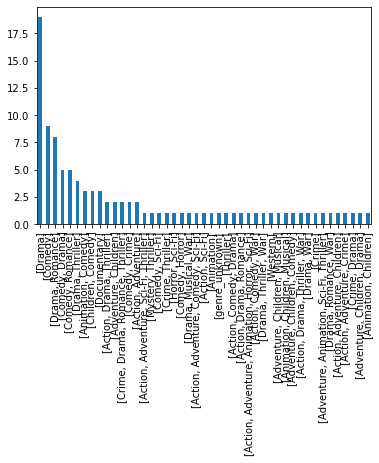

In [56]:
recs['genres'].value_counts().plot.bar()